##  Import the module

In [1]:
from numpyworld import World

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


## Draw colorful lines 1

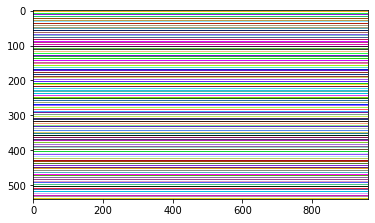

In [2]:
from numpyworld import World

world = World()
world.enable_jupyter_notebook_mode()
#world.disable_jupyter_notebook_mode()

width = 1920 // 2
height = 1080 // 2
world.create_an_image(width=width, height=height)

for y in range(height):
    if y % 2 == 0:
        color = world.get_random_color()
        for x in range(width):
            world.draw_a_point(x, y, color)

world.show()
world.save()

## Draw colorful lines 2

[54, 108, 162, 216, 270, 324, 378, 432, 486, 540]


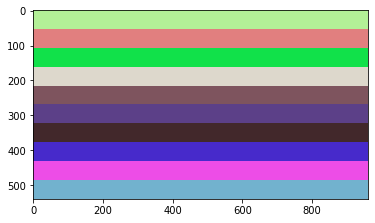

In [4]:
from numpyworld import World

world = World()
world.enable_jupyter_notebook_mode()

width = 1920 // 2
height = 1080 // 2
world.create_an_image(width=width, height=height)

parts_number = 10
part_length = height // parts_number
parts = [(part_index+1)*part_length for part_index in range(parts_number)]
print(parts)

color = world.get_random_color()
for y in range(height):
    if (y in parts):
        color = world.get_random_color()
    for x in range(width):
        world.draw_a_point(x, y, color)

world.show()
world.save()

## Draw colorful box

[0, 90, 180, 270, 360, 450, 540]
[0, 96, 192, 288, 384, 480, 576, 672, 768, 864, 960]


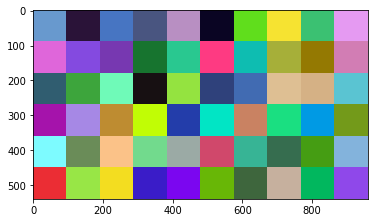

In [5]:
from numpyworld import World

world = World()
world.enable_jupyter_notebook_mode()

width = 1920 // 2
height = 1080 // 2
world.create_an_image(width=width, height=height)

y_parts_number = 6 
y_part_length = height // y_parts_number
y_parts = [(part_index+1)*y_part_length for part_index in range(y_parts_number)]
y_parts.insert(0, 0)

x_parts_number = 10
x_part_length = width // x_parts_number
x_parts = [(part_index+1)*x_part_length for part_index in range(x_parts_number)]
x_parts.insert(0, 0)

print(y_parts)
print(x_parts)

color = world.get_random_color()
for current_y_part in range(y_parts_number):
    for current_x_part in range(x_parts_number):
        color = world.get_random_color()
        for y in range(y_parts[current_y_part], y_parts[current_y_part+1]):
            for x in range(x_parts[current_x_part], x_parts[current_x_part+1]):
                world.draw_a_point(x, y, color)

world.show()
world.save()

## Draw a circle

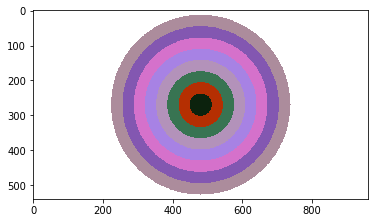

In [8]:
import math
from numpyworld import World

world = World()
world.enable_jupyter_notebook_mode()

width = 1920 // 2
height = 1080 // 2
world.create_an_image(width=width, height=height)

center_x = width // 2
center_y = height // 2

radius = height // 2.1 
parts_number = 8
part_of_radius = radius // parts_number
parts = [part_of_radius*i for i in range(parts_number+1)]
color_list = [world.get_random_color() for i in range(parts_number)]
color = color_list[0]
current_part_number = 0
for y in range(height):
    for x in range(width):
        distance = math.sqrt(math.pow((center_x - x), 2) + math.pow((center_y - y), 2))
        if distance <= radius:
            for i in range(parts_number):
                if (parts[i] <= distance <= parts[i + 1]):
                    color = color_list[i]
            world.draw_a_point(x, y, color)

world.show()
world.save()

## Draw a dynamic circle

In [1]:
import numpy as np
from moviepy.editor import VideoClip

import math
from time import sleep

from numpyworld import World

world = World()
world.enable_jupyter_notebook_mode()

width = 1920 // 4
height = 1080 // 4
world.create_an_image(width=width, height=height)

center_x = width // 2
center_y = height // 2

radius = height // 2.1 
parts_number = 8
part_of_radius = radius // parts_number
parts = [part_of_radius*i for i in range(parts_number+1)]
color_list = [world.get_random_color() for i in range(parts_number)]
color = color_list[0]
current_part_number = 0
default_frames = 8
frames = 0

def make_frame(t):
    global frames
    global color
    for y in range(height):
        for x in range(width):
            distance = math.sqrt(math.pow((center_x - x), 2) + math.pow((center_y - y), 2))
            if distance <= radius:
                for i in range(parts_number):
                    if (parts[i] <= distance <= parts[i + 1]):
                        i = i + frames - 8
                        color = color_list[i]
                world.draw_a_point(x, y, color)
    frames = int(t/0.3) % int(parts_number)
    return world.image

world.show_animation(make_frame, duration=parts_number, fps=5, saving_path=None)

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


t:   0%|          | 0/40 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


## Gate for death

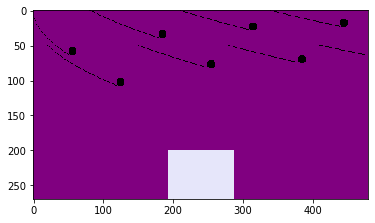

In [2]:
from numpyworld import World
import numpy as np
import math

world = World()
world.enable_jupyter_notebook_mode()

width = 1920 // 4
height = 1080 // 4
world.create_an_image(width=width, height=height, background_color=(128,0,128))

center_x = width // 2
center_y = height // 2
gate_width = width // 5
gate_height = height // 3.8
gate_top_left_x = center_x - gate_width//2
gate_top_left_y = height - gate_height

def parabola(center_x, top_y, size_in_x):
    global width, height
    
    # line
    half_size = size_in_x // 2
    p = 20 
    x_array = np.abs(np.arange(center_x-half_size, center_x+half_size))
    y_array = np.abs(np.sqrt(4*p*x_array).astype(int))
    y_min = np.amin(y_array)
    y_array = y_array - y_min
    y_array = y_array + top_y
    for index, x in np.ndenumerate(x_array):
        y = y_array[index]
        if 0<=x<width and 0<=y<height:
            #world.draw_a_point(x, y, (240,128,128))
            world.draw_a_point(x, y, (0,0,0))
    
    # circle
    half_size = half_size//3
    x_max = np.amax(x_array)
    y_max = np.amax(y_array)
    square = np.zeros((half_size, half_size))
    center_x = x_max + (half_size//2)
    center_y = y_max - (half_size//2)
    for iy in range(half_size):
        for ix in range(half_size):
            x = ix + x_max
            y = y_max - iy
            if 0<=x<width and 0<=y<height:
                distance = math.sqrt(math.pow((center_x - x - (half_size//7)), 2) + math.pow((center_y - y + (half_size//5)), 2))
                if (distance < half_size//2.5):
                    #world.draw_a_point(x, y, (255,0,0))
                    world.draw_a_point(x, y, (0,0,0))

for y in range(height):
    for x in range(width):
        # gate
        if gate_top_left_x < x < gate_top_left_x+gate_width:
            if gate_top_left_y < y < gate_top_left_y+gate_height:
                world.draw_a_point(x, y, (230,230,250))
        # dark cloud
        if x % 130 == 0:
            parabola(x, 0, 100)
            parabola(x+70, 50, 100)

world.show()
world.save()

## Test for Object 1

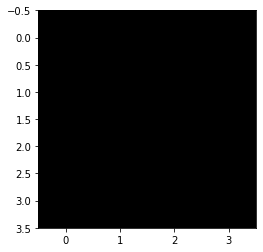

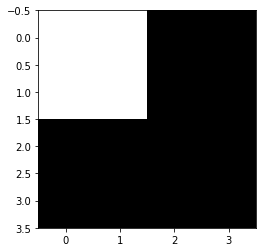

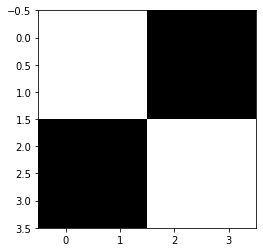

In [3]:
from numpyworld import Object, World
import numpy as np

world = World()
world.enable_jupyter_notebook_mode()
#world.disable_jupyter_notebook_mode()

width = 4
height = 4
world.create_an_image(width=width, height=height, background_color=(0,0,0))

array = np.ones((2,2,4)) * 255
obj = Object(array)

world.show()
world.draw(obj.image)
world.show()
world.draw(obj.image, (2,2))
world.show()

## Test for Object 2

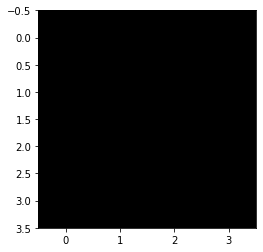

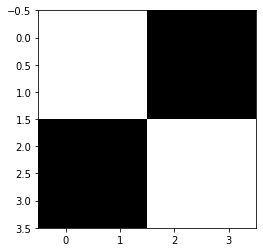

In [2]:
from numpyworld import Object, World
import numpy as np

world = World()
world.enable_jupyter_notebook_mode()
#world.disable_jupyter_notebook_mode()

width = 4
height = 4
world.create_an_image(width=width, height=height, background_color=(0,0,0))

array = np.array([[[255, 255, 255, 0], 
                   [255, 255, 255, 255]], 
                  [[255, 255, 255, 255], 
                   [255, 255, 255, 0]]])
obj = Object(array)

world.show()
world.draw(obj.image, (0,0))
world.draw(obj.image, (2,2))
world.show()